## &#128205; Basic Setups

In [1]:
# Install pip packages in the current Jupyter kernel
# https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/ 
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib==3.0.3
!{sys.executable} -m pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

# 커널을 구성하다보면 에러는 아니지만, 빨간색 네모 박스 warning이 뜨는 경우가 많다. 
# 그런 보기 싫은 부분들을 제거해주겠다.
import warnings
warnings.filterwarnings('ignore')

# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것
%matplotlib inline 

In [3]:
# os 패키지를 통해 현재 디렉토리 위치를 변경하고, read_csv를 더 편리하게 할 수 있음
import os
os.getcwd() # 현재 디렉토리 파악
os.chdir(r"______") # 불러오고 싶은 파일이 위치한 주소를 ___에 입력

FileNotFoundError: [WinError 2] 지정된 파일을 찾을 수 없습니다: '______'

**쥬피터 노트북에서 시각화할때, matplotlib가 한글 폰트 지원하지 않아, 깨짐 처리해줘야 함**

In [4]:
# 다른 노트북 작성할 때도 이 셀만 떼서 사용 가능하다.
import matplotlib.pyplot as plt 
import platform                

# 웬만하면 해주는 것이 좋다.
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': #맥os 사용자의 경우에
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':#윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

## &#128205; 1. 데이터프레임 확인

In [5]:
df=pd.read_csv("nyc_citibike.csv",encoding='euc-kr') # 한글이 들어간 csv는 encoding 인자를 넣어주는 것이 좋음
df.head()

,start_date,end_date,start_hour,end_hour,trip_duration,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,usertype,birth_year,gender,day_since_register
0,2018-05-01,2018-05-01,4,4,390,3002,South End Ave & Liberty St,40.711512,-74.015756,79,Franklin St & W Broadway,40.719116,-74.006667,21105,Subscriber,1945,male,36
1,2018-05-01,2018-05-01,1,1,854,3611,Vernon Blvd & 47 Rd,40.744907,-73.953457,3572,34 Ave & 38 St,40.756913,-73.921631,32219,Subscriber,1998,male,29
2,2018-05-01,2018-05-01,4,4,526,515,W 43 St & 10 Ave,40.760094,-73.994618,388,W 26 St & 10 Ave,40.749718,-74.002950,33433,Subscriber,1954,male,55
3,2018-05-01,2018-05-01,3,3,885,3641,Broadway & W 25 St,40.742869,-73.989186,336,Sullivan St & Washington Sq,40.730477,-73.999061,32028,Subscriber,1963,male,32
4,2018-05-01,2018-05-01,1,1,324,3440,Fulton St & Adams St,40.692418,-73.989495,3308,Kane St & Clinton St,40.686176,-73.996453,26425,Subscriber,1965,male,34


In [6]:
# 데이터 shape 파악
df.shape

(72035, 18)

In [7]:
# 데이터 통계량 파악
df.describe()

,start_hour,end_hour,trip_duration,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,birth_year,day_since_register
count,72035.000000,72035.000000,7.203500e+04,72035.000000,72035.000000,72035.000000,72035.000000,72035.000000,72035.000000,72035.000000,72035.000000,72035.000000
mean,14.176775,14.372916,1.046751e+03,1535.681488,40.738587,-73.983531,1537.181287,40.738292,-73.983435,26139.737683,1977.994947,30.468522
std,4.809857,4.854897,8.139700e+03,1418.093403,0.029777,0.018456,1420.198780,0.029736,0.018639,5793.540983,11.868175,17.341855
min,0.000000,0.000000,6.100000e+01,72.000000,40.646538,-74.025353,72.000000,40.646538,-74.044247,14529.000000,1885.000000,1.000000
25%,10.000000,10.000000,3.980000e+02,382.000000,40.718939,-73.995481,382.000000,40.718939,-73.995299,20533.000000,1969.000000,15.000000
50%,15.000000,15.000000,6.810000e+02,504.000000,40.740343,-73.986580,503.000000,40.739974,-73.986580,27840.000000,1980.000000,30.000000
75%,18.000000,18.000000,1.201000e+03,3223.000000,40.758997,-73.973747,3224.000000,40.758924,-73.973747,30995.000000,1988.000000,46.000000
max,23.000000,23.000000,1.344462e+06,3680.000000,40.814394,-73.907744,3680.000000,40.814394,-73.907744,33671.000000,2002.000000,60.000000


In [8]:
# 결측치 개수 파악
# 셀 실행 결과를 데이터프레임으로 보고 싶을 때 to_frame()과 pd.DataFrame() 두 가지를 사용 가능
df.isnull().sum().to_frame('nan_count') 

,nan_count
start_date,0
end_date,0
start_hour,0
end_hour,0
trip_duration,0
start_station_id,0
start_station_name,0
start_station_latitude,0
start_station_longitude,0
end_station_id,0


In [9]:
# 결측치 비율 파악
pd.DataFrame(data=df.isnull().sum()/len(df),columns=['nan_ratio'])

,nan_ratio
start_date,0.0
end_date,0.0
start_hour,0.0
end_hour,0.0
trip_duration,0.0
start_station_id,0.0
start_station_name,0.0
start_station_latitude,0.0
start_station_longitude,0.0
end_station_id,0.0


**결측치가 있다면 결측치에 대한 전처리를 거쳐줘야 한다.** 현 예시에서는 없으니, 패스!<br/> [결측치 제거 참고](https://eda-ai-lab.tistory.com/14)

In [10]:
# 변수 타입 파악
df.dtypes 

start_date                  object
end_date                    object
start_hour                   int64
end_hour                     int64
trip_duration                int64
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
usertype                    object
birth_year                   int64
gender                      object
day_since_register           int64
dtype: object

#### 시각화에서 중요한 건 범주형변수, 연속형변수 두가지로 구분하고 시작하는 것
> 범주형 변수 : 빈도(frequency) 계산 가능 <br/>
> 연속형 변수 : 평균, 표준편차, 분산 등의 수학적 계산 가능


- dtypes로 전체 변수 타입을 확인할때, 범주형이어도 연속형 변수 dtype일 수 있다 <br/>
- 이 예시에서는 trip_duration, day_since_register 연속형 변수, 그 외는 다 범주형<br/>
- 실제로 연속형이 아닌데, int64(연속형)인 변수들을 string으로 만들어준다

In [11]:
df['start_station_id']=df['start_station_id'].astype(str)
df['end_station_id']=df['end_station_id'].astype(str)
df['bike_id']=df['bike_id'].astype(str)

In [12]:
df.dtypes

start_date                  object
end_date                    object
start_hour                   int64
end_hour                     int64
trip_duration                int64
start_station_id            object
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id              object
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                     object
usertype                    object
birth_year                   int64
gender                      object
day_since_register           int64
dtype: object

## &#128205; 2. 데이터 도메인과 변수 이해
먼저, 가지고 있는 데이터에 대해서 이해하기 위해서는 어떤 변수들이 있는지 그리고 각 변수들의 의미와 풀고자하는 문제 간의 연관성 등을 파악해야 한다.
* 변수 이름
* 변수 타입 
* 변수들의 Segmentation
  >nyc_citibike 예시에서는. 이렇게 Segmentation 해볼 수 있다.
  >* 주행시간 변수 (start_date, end_date, start_hour, end_hour, trip_duration)
  >* 주행위치 변수 (start_station_id,start_station_name, start_station_latitude, start_station_longitutde, end_station_id,end_station_name, end_station_latitude, end_station_longitude)
  >* 대여바이크종류 변수 (bike_id)
  >* 유저정보 변수 (usertype, birth_year, gender,day_since_register)

* 단변수 분석에서, 변수들에 대해 알고 싶은 정보를 생각해낸다.
    > * 평균적 trip_duration은 얼마일까?
    > * 가장 기록(=대여 건 수)이 많은 start_hour는 언제일까?
    > * 유저들 성별 분포는 어떨까?

* 서로 영향을 줄 변수들에 대한 기대 가설을 세워본다.
    >* 신규 가입자들이 한번 탈 때 더 짧게 쓰지 않을까?
    >* gender에 따라 trip_duration이 다르지 않을까? 어떻게 다를까?
    > * start_hour이 새벽 시간대일수록 trip_duration이 짧지 않을까?

* 실제 EDA 후 기대한 가설과 결과를 보고 해석한다.

## &#128205; 3. 단일 변수 분석

### 3.1 (맞추고자 하는 타겟값 y부터 분석) 연속형 변수 분포 파악
데이터에서 예측하고자 하는 타겟 y변수가 있다면, 
타겟값부터 분석한다.
<br/> 
- 이 예시의 y값은 연속형 변수로, 이 목차는 연속형 변수에 대한 분석 방법으로 이해하면 된다. 
- **y값이 범주형 변수라면 다음 목차(범주형 변수의 빈도 파악)을 우선적으로 해주면 된다**

In [13]:
# 분석 결과의 이해를 돕기위해 데이터 단위를 바꿔줄 수도 있다.
# 현재 예시 df에서 trip_duration은 second 단위여서 직관적으로 와닿지 않는다.
# trip_duration_min으로 바꿔준다.
df['trip_duration_min']=df['trip_duration'] /60

#### 3.1.1 통계량 파악

In [14]:
df['trip_duration_min'].describe()

count    72035.000000
mean        17.445851
std        135.661662
min          1.016667
25%          6.633333
50%         11.350000
75%         20.016667
max      22407.700000
Name: trip_duration_min, dtype: float64

#### 단순히 실행 결과로 끝나지 말고 해석 보태기
> 가장 작게 빌린 건수는 1분, 평균적으로 17분을 대여한다. 최대값이 22407분인 것을 보아 outlier(정상적이지 않은 대여패턴)가 데이터에 속해 있을 것이다.

#### 3.1.2 분포(경향 위주) 파악 
데이터가 많고 연속형으로, 그 경향을 파악하기에는 <br/>
seaborn 패키지의 두 플랏을 추천. [Seaborn 활용한 Distribution 파악](https://seaborn.pydata.org/tutorial/distributions.html)<br/>
seaborn에서의 단변수 플라팅은 distplot과 kdeplot이 있는데
* **kdeplot = Kernel Density Estimation Plot.** <br/>
확률밀도가 추정되어 discrete 변수를 continuous하게 만들어 준다.
* **distplot = kdeplot + histogram** [선호]

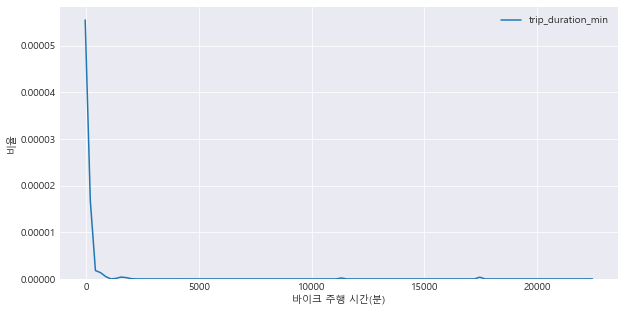

In [15]:
# kdeplot
# 빈 캔버스 사이즈 지정
plt.figure(figsize=(10,5))

# 캔버스에 그림 그리기
kde=sns.kdeplot(df['trip_duration_min']) 
kde.set_xlabel("바이크 주행 시간(분)")
kde.set_ylabel("비율")

# 다 그려진 캔버스 보여주기
plt.show() 

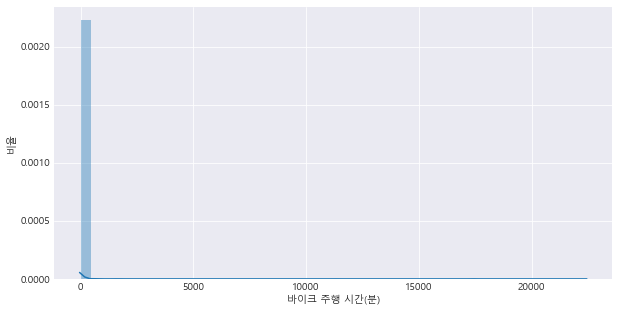

In [16]:
# distplot, shade 연한 하늘색 네모가 histogram입니다
plt.figure(figsize=(10,5)) # 빈 캔버스 사이즈 지정
dist=sns.distplot(df['trip_duration_min']) # kde=False를 넣어보자
dist.set_xlabel("바이크 주행 시간(분)")
dist.set_ylabel("비율")
plt.show() # 다 그려진 캔버스 보여주기

In [17]:
#skewness and kurtosis
print("Skewness: %f" % df['trip_duration_min'].skew())
print("Kurtosis: %f" % df['trip_duration_min'].kurt())

Skewness: 116.002624
Kurtosis: 15913.196644


#### 분포를 보고 생각해야 하는 3가지
>* 
정규분포를 따르고 있는가 / 정규분포와 유사한 형태를 띄는가?<br/>**(플라팅을 통해 눈으로 or 더 정확하고 싶으면 정규분포인지 통계적으로 검정)** <br/> 
[왜 정규분포를 따라야하는지 더 알고싶으면?](https://towardsdatascience.com/why-data-scientists-love-gaussian-6e7a7b726859)
>* 눈에 띄는 치우침 정도가 있는가 (skewness)?
>* 얼마나 뾰족한가 (kurtosis)?

#### 3.1.3  (y값 기준) 이상치 제거
위에서 살펴본 바 목표로 하는 y값에 과하게 큰 값이 있어, 이상치를 제거한 후에 EDA를 진행하고자 한다.

> 아웃라이어가 y변수 분포 상에 존재하면, 향후 이진 변수 분석에서 다른 변수들과 ~ y 관계를 볼 때도 분포가 길게 늘어져 세밀하게 볼 수 없다.<br/>
> 또한 아웃라이어 존재 여부가 만들고자하는 모델에 큰 영향을 미친다,<br/>
> 그렇다고 완전히 제거하는 것보다 아웃라이어만 떼서 살펴볼 필요도 있다 <br/>**가지고 있는 데이터에 대한 의미있는 정보를 줄 수도 있기 때문이다**

* 이상치를 제거하는 방법은 아주 다양한데
* 일단은, y값 기준 최상위 1% 값을 제거하는 방식을 택한다.

In [18]:
cut_point = df["trip_duration_min"].quantile(0.99) # 상위 99% 값을 cut_point로 지정
df_cut=df[df['trip_duration_min'] < cut_point]

**이상치를 제거하고 분포를 다시 그려보자.**

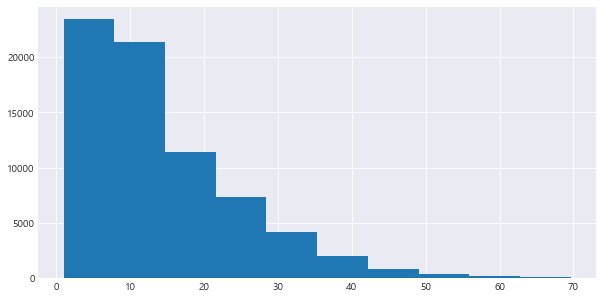

In [19]:
# 단순 pandas visualization 활용!
plt.figure(figsize=(10,5))
df_cut['trip_duration_min'].hist()
plt.show()

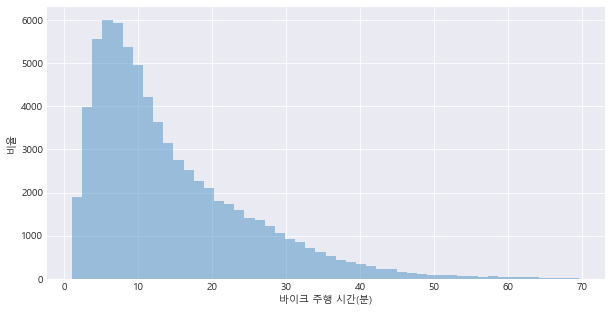

In [20]:
# seaborn의 distplot, shade 연한 하늘색 네모가 histogram
plt.figure(figsize=(10,5)) # 빈 캔버스 사이즈 지정
dist=sns.distplot(df_cut['trip_duration_min'],kde=False) # kde=False를 넣어보자
dist.set_xlabel("바이크 주행 시간(분)")
dist.set_ylabel("비율")
plt.show() # 다 그려진 캔버스 보여주기

In [21]:
#skewness and kurtosis
print("Skewness: %f" % df_cut['trip_duration_min'].skew())
print("Kurtosis: %f" % df_cut['trip_duration_min'].kurt())

Skewness: 1.418011
Kurtosis: 2.307984


#### 분포를 보정한 후 다시 생각해야 하는 3가지
>* 
정규분포를 따르고 있는가 / 정규분포와 유사한 형태를 띄는가?<br/>**(플라팅을 통해 눈으로 or 더 정확하고 싶으면 정규분포인지 통계적으로 검정)** <br/> 
[왜 정규분포를 따라야하는지 더 알고싶으면?](https://towardsdatascience.com/why-data-scientists-love-gaussian-6e7a7b726859)
>* 눈에 띄는 치우침 정도가 있는가 (skewness)?
>* 얼마나 뾰족한가 (kurtosis)?

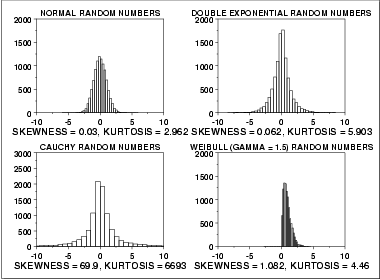

[이미지 출처, 더 자세한 설명은 여기로](https://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm)

### 3.2  범주형 변수의 빈도 파악

#### 3.2.1 범주형 변수가 30개 이하일 때, 빈도표(Counting and Basic Frequency Plots)
>30개가 아니더라도, 범주형 변수의 고유 값이 X축에 전부 표현될 수 있다면


 **A. Pandas visualization 활용 dataframe.plot() 형태**
 <br/> 장점: 정말 편하고, customizing이 쉽고, 구글링할 자료가 많다
 <br/> 단점: 타 패키지보다 덜 예쁘다

In [22]:
# 대여 시작 시간대(start_hour)의 빈도표
df_cut['start_hour'].value_counts()

18    8171
17    7954
8     6640
19    5576
16    4687
9     4265
7     3971
20    3624
15    3544
14    3398
13    3210
12    3109
11    2763
10    2640
21    2374
6     1855
22    1574
23     918
5      476
0      235
1      110
4       77
2       77
3       66
Name: start_hour, dtype: int64

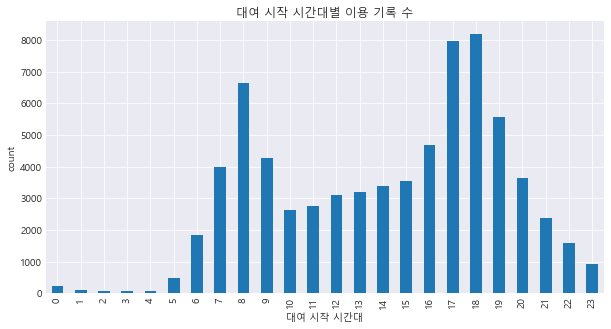

In [23]:
# 시간대 순(x축에 따라) 으로 정렬
plt.figure(figsize=(10,5))# 있어도 되고 없어도 되는 코드, 다만 캔버스를 준비한다는 의미
df_cut['start_hour'].value_counts().sort_index(ascending=True).plot(kind='bar')
plt.xlabel('대여 시작 시간대')
plt.ylabel('count')
plt.title('대여 시작 시간대별 이용 기록 수')
plt.show() # 캔버스를 보여준다

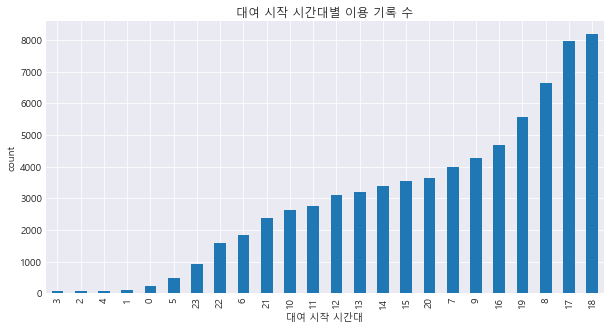

In [24]:
# 빈도가 적은 순으로 정렬
plt.figure(figsize=(10,5))# 있어도 되고 없어도 되는 코드, 다만 캔버스를 준비한다는 의미
df_cut['start_hour'].value_counts(ascending=True).plot(kind='bar')
plt.xlabel('대여 시작 시간대')
plt.ylabel('count')
plt.title('대여 시작 시간대별 이용 기록 수')
plt.show() # 캔버스를 보여준다

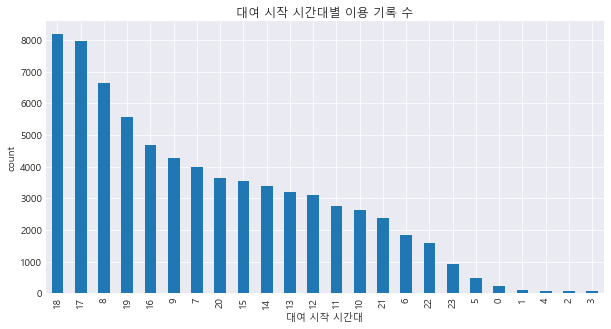

In [25]:
# 빈도가 많은 순으로 정렬
plt.figure(figsize=(10,5)) # 있어도 되고 없어도 되는 코드, 다만 캔버스를 준비한다는 의미
df_cut['start_hour'].value_counts().plot(kind='bar')
plt.xlabel('대여 시작 시간대')
plt.ylabel('count')
plt.title('대여 시작 시간대별 이용 기록 수')
plt.show() # 캔버스를 보여준다

**해석 보태기**
> 주로 오후 5-6시가 가장 많은 대여 건수를 보였고, 그 다음은 오전 8시가 많았다. 뉴욕 기준 퇴근과 출근 시간대의 양상을 반영하고 있다.
> <br/> 새벽 시간대 특히 0시 ~ 4시에서 대여 건수가 지나치게 낮다.

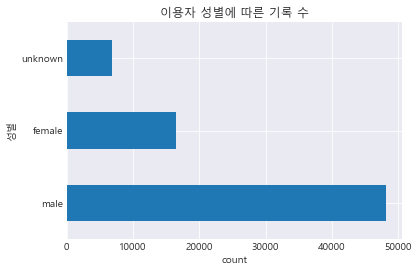

In [26]:
# 성별 (gender) 의 빈도표
plt.figure()
df_cut['gender'].value_counts().plot(kind='barh')
plt.xlabel('count')
plt.ylabel('성별')
plt.title('이용자 성별에 따른 기록 수')
plt.show()

**해석 보태기**
> 남성 사용자 48310명으로, 여성 사용자 16568명에 비해 3배 가량 많았다.

#### 3.2.2 범주형 변수가 30개 이상일 때, 빈도표(Counting and Basic Frequency Plots)
>30개가 넘지 않더라도, 범주형 변수의 고유 값이 X축에 전부 표현되기 어렵다면

범주형 변수의 고유값이 많을 때, 상위 또는 하위 n개로 자르고 Horizontal로 시각화

In [27]:
# start_station 대여 시작 지점별 빈도
# .nlargest(N) 는 N개 가장 큰 값을 가져와라
df_cut['start_station_name'].value_counts().nlargest(10)

Pershing Square North    749
West St & Chambers St    504
Broadway & E 22 St       501
W 21 St & 6 Ave          468
8 Ave & W 33 St          443
E 17 St & Broadway       442
E 47 St & Park Ave       441
W 41 St & 8 Ave          436
W 22 St & 10 Ave         431
W 38 St & 8 Ave          407
Name: start_station_name, dtype: int64

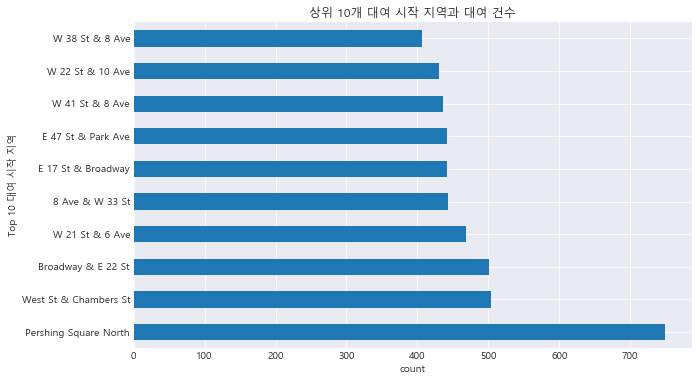

In [28]:
plt.figure(figsize=(10,6))
df_cut['start_station_name'].value_counts().nlargest(10).plot(kind='barh')
plt.xlabel('count')
plt.ylabel('Top 10 대여 시작 지역')
plt.title('상위 10개 대여 시작 지역과 대여 건수')
plt.show()

## &#128205; 4. 이진 변수 분석
단일 변수, 즉 변수 하나가 아닌 두 변수간의 관계를 살핍니다.
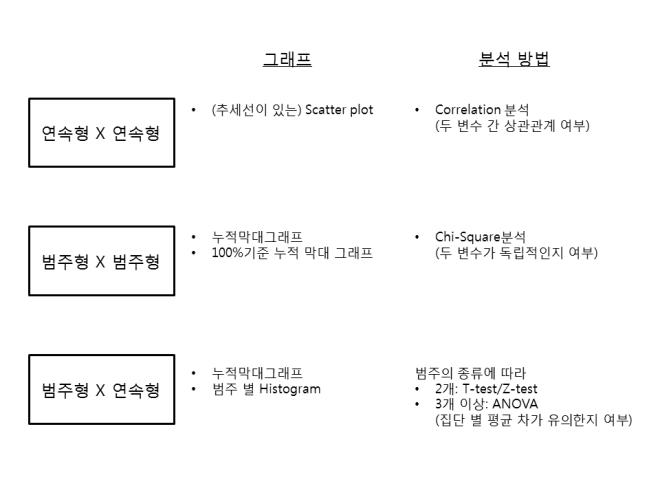

### 4.1 연속형 변수 - 연속형 변수 관계

신규 가입자(day_since_register이 작을수록)일수록, 주행 시간(trip_duration)이 더 짧지 않을까? <br/>
가입한 지 기간(x)과 주행 시간(y)의 관계를 보자.

#### 4.1.1 Scatterplot
Pandas Visualization 활용

<Figure size 720x360 with 0 Axes>

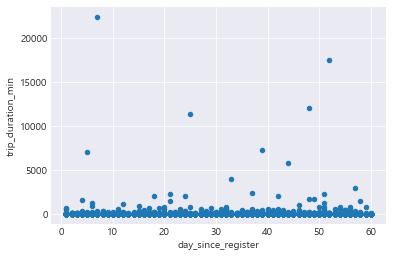

In [29]:
# pandas dataframe의 함수 plot()
plt.figure(figsize=(10,5))
df.plot.scatter(x='day_since_register',y='trip_duration_min')
plt.show()

#### 4.1.2 Scatterplot with Regression fit
Seaborn 활용

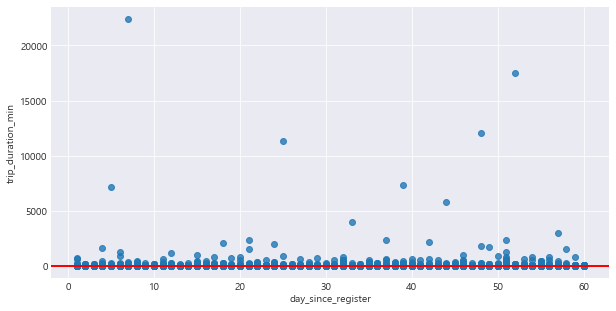

In [30]:
plt.figure(figsize=(10,5))
reg=sns.regplot(x=df['day_since_register'],y=df['trip_duration_min'],
                line_kws={"color":"red","lw":2})
plt.show()

**해석 보태기**
>어떤 해석이 가능할까요?

### 4.2 범주형 변수 - 범주형 변수 관계

seaborn countplot 활용 누적 막대 그래프<br/>
**변수 1 IN x축 or y축 하나 / 변수 2 IN hue(색상)**

[Countplot 링크](https://seaborn.pydata.org/generated/seaborn.countplot.html)

**A. Vertical Countplot 은 x명시**

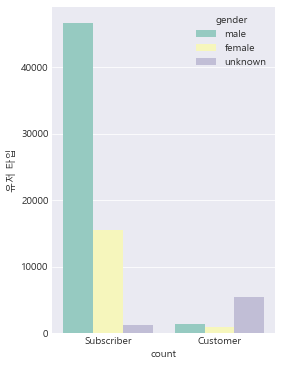

In [31]:
# 성별 gender 별 usertype 분포
plt.figure(figsize=(4,6))
cnt=sns.countplot(x='usertype',hue='gender',data=df_cut,palette='Set3')
cnt.set_xlabel("count")
cnt.set_ylabel("유저 타입")
plt.show()

**해석 보태기**
> 구독자가 아닌 일시적인 Customer에는 성별조차 등록하지 않은 멤버가 많다.

**B. Horizontal Countplot 은 y명시**

In [32]:
# 상위 10개 시작 지점으로 시작된 기록 건수만 남겨 df_top으로 생성
top_list=df_cut['start_station_name'].value_counts().nlargest(10).index
df_top=df_cut[df_cut['start_station_name'].isin(top_list)]

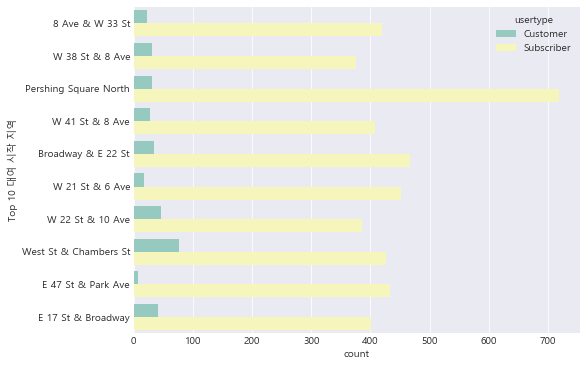

In [33]:
# 상위 대여시작지점 별 usertype 분포
plt.figure(figsize=(8,6))
cnt=sns.countplot(y='start_station_name',hue='usertype',data=df_top,palette='Set3')
cnt.set_xlabel("count")
cnt.set_ylabel("Top 10 대여 시작 지역")
plt.show()

**해석 보태기**
> 어떤 해석이 가능할까요?

### 4.3 범주형 변수 - 연속형 변수 관계
#### 4.3.1 범주형 변수가 10개 이하
**A. seaborn의 boxplot**

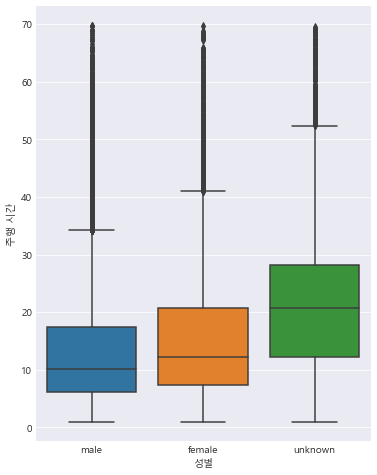

In [34]:
# 성별 gender 와 주행 시간 trip_duration
plt.figure(figsize=(6,8))
box=sns.boxplot(x='gender',y='trip_duration_min',data=df_cut)
box.set_xlabel("성별")
box.set_ylabel("주행 시간")
plt.show()

**B. seaborn의 catplot, 그 안의 box 또는 boxen** <br/>
kind='boxen'을 kind='box'로 변경하실 수 있습니다
<br/> boxen 그래프는 boxplot에서 **더 많은 정보를 담는 신상 그래프**입니다

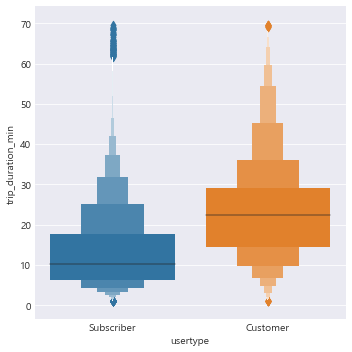

In [35]:
# Usertype 과 주행 시간 trip_duration
sns.catplot(x='usertype',y='trip_duration_min', kind='boxen',data=df_cut)
plt.show()

**해석 보태기**
>어떤 해석이 가능할까요? [박스플랏 해석방법](https://codedragon.tistory.com/7012)

#### 4.3.2 범주형 변수가 10개 이상
범주형 변수의 고유값이 많을 때, 상위 또는 하위 n개로 자르고 Horizontal로 시각화

In [36]:
# 상위 10개 시작 지점으로 시작된 기록 건수만 남겨 df_top으로 생성
top_list=df_cut['start_station_name'].value_counts().nlargest(10).index
df_top=df_cut[df_cut['start_station_name'].isin(top_list)]

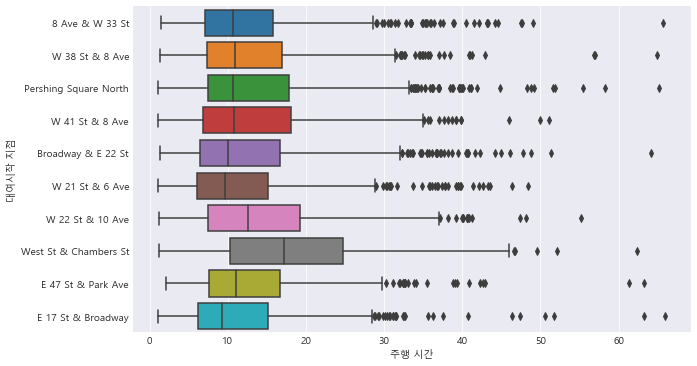

In [37]:
plt.figure(figsize=(10,6))
box=sns.boxplot(y='start_station_name',x='trip_duration_min',data=df_top)
box.set_xlabel("주행 시간")
box.set_ylabel("대여시작 지점")
plt.show()

**해석 보태기**
> West St & Chambers St 에서 유난히 주행시간 평균이 높고, 넓게 퍼져 있다. <br/> 더불어 건수도 상위2위로 많으니, 여기에 바이크를 더 배치해놓는 액션을 하자! <br/>[박스플랏 해석방법](https://codedragon.tistory.com/7012)

## &#128205; 5. 3개 이상의 변수 분석

### 5.1 버블도(Bubble Scatter Chart, Bubble Plot)
일반 scatterplot처럼 x와 y의 관계를 나타내지만,<br/>
**버블의 크기 또는 색상**이 또 하나의 정보로 표시됨.<br/>
크기, 색상 둘다 추가해서 **총 x,y,크기,색상의 4변수 그래프 가능하다** 하지만 정보가 과하면 안 좋은 시각화임을 유의할 것! <br/>
[Bubble Chart various types with Python](https://python-graph-gallery.com/bubble-plot/) <br/>
[3개 이상 변수를 시각화하는 4가지 방법](https://m.blog.naver.com/PostView.nhn?blogId=jiehyunkim&logNo=220822154180&proxyReferer=https%3A%2F%2Fwww.google.com%2F)

**상위 top 10개 시작 지역 / 시작 시간대별 / 주행 시간**

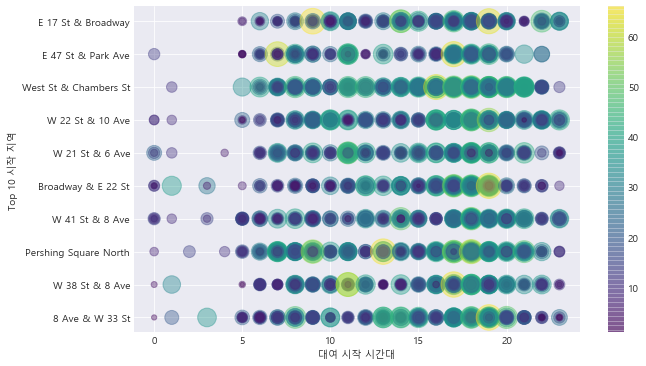

In [38]:
plt.figure(figsize=(10,6))
plt.scatter(df_top['start_hour'], # x축
            df_top['start_station_name'], # y축
            c=df_top['trip_duration_min'], # 색상
            s=10*df_top['trip_duration_min'], # 사이즈 
            # 10을 곱해본 이유는 그래프 사이즈에 맞게 원의 지름을 키워주기 위함
            alpha=0.4, # 투명도
            cmap='viridis') # 컬러바 종류
plt.colorbar()
plt.ylabel('Top 10 시작 지역')
plt.xlabel('대여 시작 시간대')
# plt.xticks(rotation=90) # x축에 종류가 많으면 label 돌려주기
plt.show()

**해석 보태기**
> 변수가 더 낄수록 보기 어려워짐. 
> <br/>일단 이 그래프는 보통 수요가 없는 새벽 시간대에도 Broadway & E 22 St, W 38 St & 8 Ave 쪽에서 꽤 주행 시간이 긴 수요가 발생하고 있다고 이해해볼 수 있다.

### 5.2 히트맵(Heatmap)의 스마트한 활용
heatmap은 실전에서 잘 쓰이고, 직관적이다 
<br/> 위 그래프를 히트맵으로 그려봄

**상위 top 10개 시작 지역 / 시작 시간대별 / 주행 시간**

In [39]:
# 핵심은 groupby
base=df_top.groupby(['start_station_name','start_hour'])['bike_id'].count().unstack()
base

start_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
start_station_name,,,,,,,,,,,,,,,,,,,,,
8 Ave & W 33 St,1.0,1.0,NaN,1.0,NaN,12.0,23.0,21.0,45.0,34.0,...,9.0,19.0,23.0,53.0,53.0,48.0,17.0,21.0,15.0,5.0
Broadway & E 22 St,5.0,1.0,NaN,2.0,NaN,1.0,5.0,9.0,32.0,16.0,...,26.0,20.0,30.0,74.0,133.0,67.0,15.0,8.0,6.0,1.0
E 17 St & Broadway,NaN,NaN,NaN,NaN,NaN,2.0,7.0,11.0,17.0,26.0,...,30.0,21.0,36.0,56.0,54.0,41.0,28.0,7.0,16.0,9.0
E 47 St & Park Ave,1.0,NaN,NaN,NaN,NaN,5.0,11.0,36.0,34.0,14.0,...,6.0,12.0,34.0,116.0,97.0,30.0,8.0,1.0,2.0,NaN
Pershing Square North,1.0,NaN,1.0,NaN,1.0,6.0,9.0,57.0,99.0,72.0,...,17.0,27.0,39.0,100.0,128.0,62.0,20.0,18.0,9.0,3.0
W 21 St & 6 Ave,3.0,1.0,NaN,NaN,1.0,NaN,9.0,22.0,30.0,29.0,...,17.0,23.0,30.0,46.0,71.0,34.0,20.0,22.0,2.0,8.0
W 22 St & 10 Ave,2.0,1.0,NaN,NaN,NaN,4.0,3.0,20.0,35.0,32.0,...,19.0,13.0,34.0,30.0,65.0,28.0,29.0,23.0,26.0,8.0
W 38 St & 8 Ave,1.0,1.0,NaN,NaN,NaN,2.0,20.0,8.0,37.0,42.0,...,18.0,17.0,17.0,53.0,61.0,43.0,11.0,10.0,9.0,4.0
W 41 St & 8 Ave,5.0,1.0,NaN,2.0,NaN,38.0,29.0,10.0,21.0,31.0,...,16.0,14.0,11.0,51.0,76.0,42.0,25.0,16.0,7.0,7.0


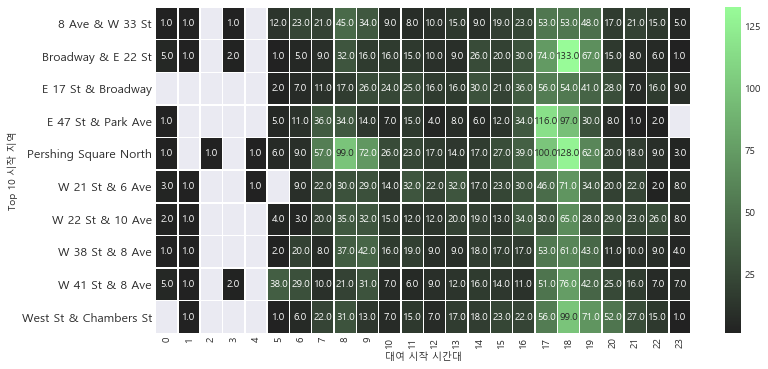

In [40]:
fig, ax = plt.subplots(figsize=(12,6))
pal = sns.dark_palette("palegreen", as_cmap=True) # color palette 설정
sns.heatmap(base, 
            annot=True, # 셀에 숫자 표기
            ax=ax, # 위에서 만들어 둔 캔버스의 (Matplotlib) Axes
            linewidths=.5, # 셀을 나눌 선의 너비
            fmt='.1f',
           cmap=pal) # 소수점 자리 처리
plt.ylabel('Top 10 시작 지역')
plt.xlabel('대여 시작 시간대') 
plt.xticks(rotation=90) 
plt.yticks(fontsize=12)# x축에 종류가 많으니까 label 돌려주기
plt.show()

# heatmap이 아래 위로 잘린다면 현 matplotlib 3.1.1 의 오류
# This was a matplotlib regression introduced in 3.1.1 which has been fixed in 3.1.2 (still forthcoming). 
# For now the fix is to downgrade matplotlib to a prior version.

**해석 보태기**
> 어떤 해석이 가능할까요?

## &#128205; 6. 상관관계 분석 (Correlogram)

### 6.1 Heatmap

Scatter plots are useful for spotting structured relationships between variables, like whether you could summarize the relationship between two variables with a line. Attributes with structured relationships may also be correlated and good candidates for removal from your dataset.

**시각화 코드는 함수로 작성해서 활용할 수도 있습니다**

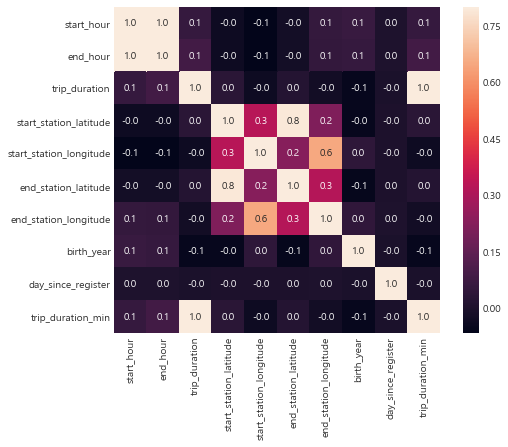

In [41]:
# 전체 데이터셋 히트맵

def draw_corrmat(df):
  y_corrmat = df.corr()
  f, ax = plt.subplots(figsize=(8,6))
  sns.heatmap(y_corrmat, vmax=.8, annot=True, fmt='.1f', square=True);
  
draw_corrmat(df_cut)

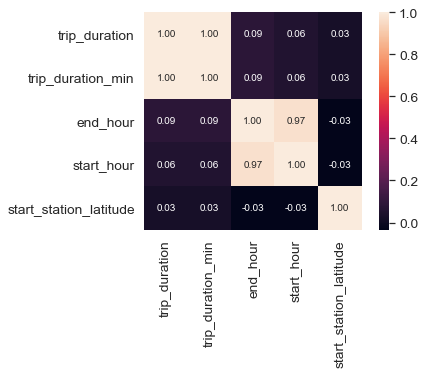

In [42]:
# 입력값 정보
# df = 데이터프레임
# y = 주요하게 보고 싶은 값
# k = 그 y값으로부터 가장 상관관계가 강한 TOP k개를 보겠다

def draw_top_corrmat(df,y,k):
  #k is choosing top k corrleation variables for the heatmap
  y_corrmat = df.corr()
  y_cols = y_corrmat.nlargest(k, y)[y].index
  cm = np.corrcoef(df[y_cols].values.T)
  sns.set(font_scale=1.25)
  f, ax = plt.subplots(figsize=(6,4))
  hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=y_cols.values, xticklabels=y_cols.values)
  plt.show()
    
draw_top_corrmat(df_cut,'trip_duration_min',5)

#### 왜 굳이 함수로 작성했을까요? 자동화하고 간편하게 하려구요
그럼 어떻게 더더 간편하게 할까요?<br/>
함수와 함께 짜서 쓰는 Interactive (동적인) EDA 방식이 있습니다
- 직접 그래프를 더 탐색해보고 싶은 목적이 있는 분들에게 보내는 그래프라면 추천
- 여러가지 y변수를 두고 이진변수관계 분석을 해야할 때 추천
- Jupyter Notebook에서는 Ipywidget, Plotly
- Colab Notebook 에서는 Widget

**관련 링크**
- [how to dive into interactive eda?](https://towardsdatascience.com/interactive-controls-for-jupyter-notebooks-f5c94829aee6)
- [sample codes](https://nbviewer.jupyter.org/github/zzsza/TIL/blob/master/python/visualization(cufflinks).ipynb)
#### &#128587; 다음 노트북에서 뵙겠습니다